## The Singular Value Decomposition

More important in today's world than the eigenvalue decomposition.  Shows up in machine learning, image compression, and many discrete applications.

1. The Definition:

$$A = U \Sigma V^T $$

(more generally: $U \Sigma V^H$ for complex matrices)

U is (essentially) orthogonal <br>
V is (essentially) orthogonal <br>
$\Sigma$ is (essentially) diagonal

The most basic SVD is a matrix decomposition of a matrix A into $U$ Diagonal($\sigma$) $V^T$, where $U$ and $V$ are  square orthogonal and $\sigma$ is a vector of decreasing singular
values that are non-negative. The notation $\Sigma$ denotes the diagonal matrix

$$
\Sigma = \begin{pmatrix}
\sigma_1 & 0 & \cdots \\
0 & \sigma_2 & \cdots \\
& & \ddots
\end{pmatrix}
$$

a. Square Example

In [23]:
A = randn(5,5)
U,σ,V = svd(A)
display(U), display(σ), display(V);

5×5 Array{Float64,2}:
  0.513613  -0.824629   0.141989   0.164573   0.0945683
 -0.342251  -0.42556   -0.721223  -0.425137  -0.0293129
 -0.614903  -0.280632   0.568145  -0.216612   0.41645  
  0.466769   0.167298   0.170307  -0.841251   0.132028 
  0.151944   0.179285  -0.328456   0.193781   0.894056 

5-element Array{Float64,1}:
 3.42148 
 2.35644 
 1.74295 
 0.558491
 0.161109

5×5 Array{Float64,2}:
  0.0664676   0.610989   0.731656   -0.285896  -0.0722326
  0.760401    0.208467  -0.119426    0.424905  -0.428399 
 -0.232238    0.142936  -0.366175   -0.499638  -0.736147 
  0.578641   -0.460004   0.0883063  -0.655111   0.128846 
 -0.169153   -0.592621   0.555459    0.242714  -0.502735 

In [25]:
σ
Σ = Diagonal(σ)

5×5 Diagonal{Float64}:
 3.42148   ⋅        ⋅        ⋅         ⋅      
  ⋅       2.35644   ⋅        ⋅         ⋅      
  ⋅        ⋅       1.74295   ⋅         ⋅      
  ⋅        ⋅        ⋅       0.558491   ⋅      
  ⋅        ⋅        ⋅        ⋅        0.161109

In [26]:
display(round(U'U,2))

5×5 Array{Float64,2}:
  1.0  -0.0   0.0  -0.0  -0.0
 -0.0   1.0   0.0   0.0   0.0
  0.0   0.0   1.0  -0.0  -0.0
 -0.0   0.0  -0.0   1.0  -0.0
 -0.0   0.0  -0.0  -0.0   1.0

In [27]:
display(round(V'V,2))

5×5 Array{Float64,2}:
  1.0  -0.0  -0.0  -0.0   0.0
 -0.0   1.0   0.0  -0.0  -0.0
 -0.0   0.0   1.0   0.0  -0.0
 -0.0  -0.0   0.0   1.0  -0.0
  0.0  -0.0  -0.0  -0.0   1.0

In [28]:
display(σ)

5-element Array{Float64,1}:
 3.42148 
 2.35644 
 1.74295 
 0.558491
 0.161109

In [29]:
Σ=Diagonal(σ)
display(U*Σ*V')

5×5 Array{Float64,2}:
 -0.916768   0.934147  -0.833626    1.87433      1.00643  
 -1.54205   -1.04822    0.711027   -0.172366     0.0388622
  0.210381  -1.93606    0.0425269  -0.737852     1.23472  
  0.696988   1.05238   -0.204153    1.07951     -0.463617 
 -0.167525   0.536031  -0.0108266   0.00358591  -0.702442 

In [30]:
display(A)

5×5 Array{Float64,2}:
 -0.916768   0.934147  -0.833626    1.87433      1.00643  
 -1.54205   -1.04822    0.711027   -0.172366     0.0388622
  0.210381  -1.93606    0.0425269  -0.737852     1.23472  
  0.696988   1.05238   -0.204153    1.07951     -0.463617 
 -0.167525   0.536031  -0.0108266   0.00358591  -0.702442 

b. "tall-skinny" full column rank example

In [31]:
A = randn(5,3)
U,σ,V = svd(A,thin=false) # thin=false gives the basic svd, 
                          # often the default (thin=true) is more useful
display(U), display(σ), display(V);

5×5 Array{Float64,2}:
  0.810139   0.338696    0.299039  -0.299995     0.22257 
  0.402856   0.0789838  -0.376513   0.204625    -0.804882
 -0.285771   0.294667   -0.255062  -0.849708    -0.210823
 -0.213102   0.877261   -0.137786   0.382254     0.14106 
  0.23303   -0.150437   -0.827509  -0.00325727   0.488143

3-element Array{Float64,1}:
 2.97091
 2.29681
 1.36287

3×3 Array{Float64,2}:
  0.115723    0.731948   -0.671462
  0.0458887  -0.679221   -0.732498
 -0.992221    0.0539545  -0.11219 

In [33]:
Σ = zeros(A) # Make Σ the size of A
for i=1:length(σ) Σ[i,i]=σ[i] end # put the singular values on the diagonal

display(A)
U*Σ*V'

5×3 Array{Float64,2}:
 0.574272  -0.716464  -2.39188 
 0.615839   0.307576  -1.12018 
 0.630541  -0.244026   0.917911
 1.52763   -1.26007    0.757964
 0.584474   1.09256   -0.579043

5×3 Array{Float64,2}:
 0.574272  -0.716464  -2.39188 
 0.615839   0.307576  -1.12018 
 0.630541  -0.244026   0.917911
 1.52763   -1.26007    0.757964
 0.584474   1.09256   -0.579043

In [34]:
Σ

5×3 Array{Float64,2}:
 2.97091  0.0      0.0    
 0.0      2.29681  0.0    
 0.0      0.0      1.36287
 0.0      0.0      0.0    
 0.0      0.0      0.0    

c. short fat matrix

In [37]:
A = randn(3,5)
U,σ,V = svd(A,thin=false) # thin=false gives the basic svd, 
                          # often the default (thin=true) is more useful
display(U), display(σ), display(V)
Σ = zeros(A) # Make Σ the size of A
for i=1:length(σ) Σ[i,i]=σ[i] end # put the singular values on the diagonal
U*Σ*V'
display(A)

3×3 Array{Float64,2}:
 -0.8114    -0.581699  -0.0570579
  0.476282  -0.71461    0.512337 
 -0.3388     0.388534   0.856887 

3-element Array{Float64,1}:
 3.22529
 2.72547
 0.54365

5×5 Array{Float64,2}:
 -0.296887    0.110367  0.569592  -0.30033      -0.696451 
  0.779324   -0.447185  0.213706  -0.377802     -0.0653816
 -0.49042    -0.772194  0.265936   0.000177309   0.304109 
  0.243332   -0.10994   0.360083   0.870736     -0.202144 
  0.0692114   0.423643  0.655372  -0.0942676     0.614278 

3×5 Array{Float64,2}:
  0.584308  -1.33715   2.49942   -0.473669  -0.873102
 -0.512368   2.12764   0.824679   0.688211  -0.536248
  0.706631  -1.22558  -0.157926  -0.214571   0.678287

In [38]:
A

3×5 Array{Float64,2}:
  0.584308  -1.33715   2.49942   -0.473669  -0.873102
 -0.512368   2.12764   0.824679   0.688211  -0.536248
  0.706631  -1.22558  -0.157926  -0.214571   0.678287

In [39]:
Σ

3×5 Array{Float64,2}:
 3.22529  0.0      0.0      0.0  0.0
 0.0      2.72547  0.0      0.0  0.0
 0.0      0.0      0.54365  0.0  0.0

Thin: for tall skinny, U is the size of A, Σ is square <br>
Thin: for short fat, V is the size of A, Σ is square 

In [40]:
A = randn(5,3)
U,σ,V = svd(A) # thin = true
display(U)
display(round(U'U,2))
display(A)
U*Diagonal(σ)*V'

5×3 Array{Float64,2}:
  0.416358  -0.185234    0.133003  
 -0.408551  -0.0556776   0.17798   
 -0.667743  -0.454074   -0.418515  
  0.300348   0.170079   -0.880587  
 -0.351628   0.852923   -0.00670769

3×3 Array{Float64,2}:
  1.0   0.0  -0.0
  0.0   1.0  -0.0
 -0.0  -0.0   1.0

5×3 Array{Float64,2}:
  1.41943   -0.706856   0.954102
 -1.12798   -0.124098  -1.27136 
 -2.17791   -1.62929   -1.76885 
  0.320932   0.449232   1.52172 
 -1.3431     3.14622   -0.525568

5×3 Array{Float64,2}:
  1.41943   -0.706856   0.954102
 -1.12798   -0.124098  -1.27136 
 -2.17791   -1.62929   -1.76885 
  0.320932   0.449232   1.52172 
 -1.3431     3.14622   -0.525568

In [42]:
A = randn(3,5)
U,σ,V = svd(A)
display(V)
display(round(V'V,2))
display(A)
U*Diagonal(σ)*V'

5×3 Array{Float64,2}:
  0.253326    0.732521  -0.214261 
 -0.0575466  -0.46806   -0.821263 
 -0.294555    0.456574  -0.501675 
  0.157209    0.15235   -0.0923805
  0.906111   -0.112532  -0.13931  

3×3 Array{Float64,2}:
  1.0  0.0  -0.0
  0.0  1.0   0.0
 -0.0  0.0   1.0

3×5 Array{Float64,2}:
 -0.326712  -0.593739    0.271517  -0.265982   -1.56749 
 -1.48726    1.07254    -0.233928  -0.433505   -0.964657
 -0.682066   0.0822379  -1.22995   -0.0246056   1.29935 

3×5 Array{Float64,2}:
 -0.326712  -0.593739    0.271517  -0.265982   -1.56749 
 -1.48726    1.07254    -0.233928  -0.433505   -0.964657
 -0.682066   0.0822379  -1.22995   -0.0246056   1.29935 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  111k  100  111k    0     0   854k      0 --:--:-- --:--:-- --:--:--  858k


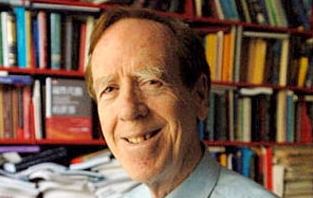

In [43]:
using Images, Interact
picture = download("http://web.mit.edu/jfrench/Public/gstrang.png")
pimage = load(picture)


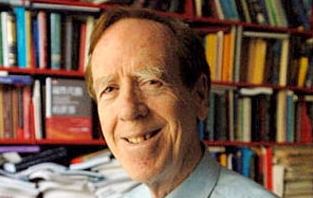

In [46]:
pimage

In [47]:
p = float.(channelview(pimage)) # convert to an array

3×198×313 Array{Float32,3}:
[:, :, 1] =
 0.501961  0.407843  0.27451   0.152941  …  0.811765  0.729412  0.690196
 0.576471  0.466667  0.282353  0.129412     0.776471  0.686275  0.631373
 0.592157  0.454902  0.270588  0.137255     0.788235  0.701961  0.611765

[:, :, 2] =
 0.478431  0.4       0.278431  0.156863  …  0.792157  0.717647  0.67451 
 0.560784  0.462745  0.298039  0.133333     0.74902   0.670588  0.607843
 0.572549  0.45098   0.27451   0.141176     0.764706  0.686275  0.576471

[:, :, 3] =
 0.47451   0.403922  0.298039  0.168627  …  0.788235  0.717647  0.67451 
 0.556863  0.478431  0.317647  0.145098     0.741176  0.670588  0.603922
 0.560784  0.454902  0.294118  0.145098     0.74902   0.678431  0.564706

...

[:, :, 311] =
 0.180392  0.14902   0.14902   0.145098  …  0.521569  0.576471  0.627451
 0.203922  0.211765  0.211765  0.160784     0.431373  0.529412  0.588235
 0.196078  0.2       0.211765  0.196078     0.258824  0.333333  0.447059

[:, :, 312] =
 0.160784  0.12549   0.

In [48]:
pr,pg,pb = p[1,:,:],p[2,:,:],p[3,:,:]
Ur,σr,Vr = svd(pr)
Ug,σg,Vg = svd(pg)
Ub,σb,Vb = svd(pb)

(
Float32[-0.0425342 -0.0450355 … 0.00151836 0.00756665; -0.0404301 -0.0474971 … 0.0181529 -0.0318149; … ; -0.143038 0.101536 … 0.0478255 -0.0318742; -0.144002 0.111712 … 0.0020869 -0.00648022],

Float32[85.0721,21.0869,16.5932,14.0062,11.7329,10.1639,9.09969,7.38199,7.21165,6.61043  …  0.0242462,0.022777,0.0226533,0.0215464,0.0208985,0.0198097,0.0191087,0.0189206,0.0177044,0.0170277],
Float32[-0.0697387 -0.0166765 … -0.00833062 -0.00208743; -0.0695658 -0.0410424 … 0.0132683 0.054568; … ; -0.0231986 -0.00117249 … 0.00207896 -0.0117388; -0.0217245 0.00349054 … 0.0677017 0.0426328])

In [21]:
using Interact

Interact.Slider{Int64}(Signal{Int64}(1, nactions=1),"",1,1:40,"horizontal",true,"d",true)

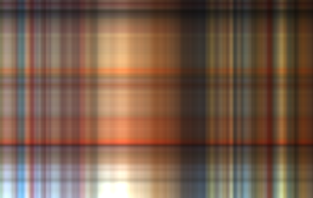

In [113]:
@manipulate for k=slider(1:40,value=1)
p̂r = Ur[:,1:k]*Diagonal(σr[1:k])*Vr[:,1:k]'
p̂g = Ug[:,1:k]*Diagonal(σg[1:k])*Vg[:,1:k]'
p̂b = Ub[:,1:k]*Diagonal(σb[1:k])*Vb[:,1:k]'
img = colorview(RGB, p̂r,p̂g,p̂b)
    
end

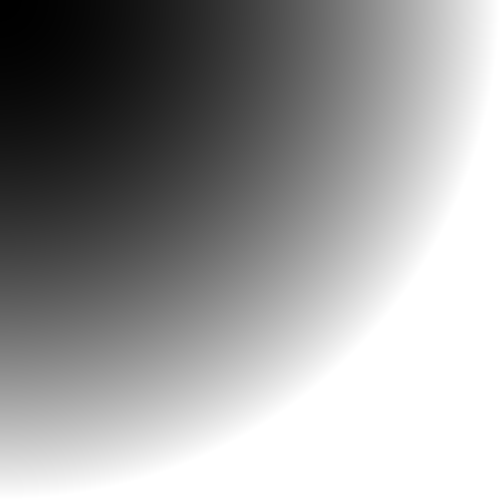

In [112]:
u = 1.0*[1:500;]/500
v = 1.0*[1:500;]/500
img = colorview(Gray,u.^2.+v'.^2)

u = [1:5;]
v = u
u*v'`

Moral of the story:  if k is large enough
    U[:,1:k] * Diagonal(sigma(1:k)) * V[:,1:k]'
    is a good approsimation to A often requiring less storage and less computation

let $u=$Ur[:,1:1], that is the first column of Ur <br>
let $v=$Vr[:,1:1], that is the first column of Vr <br>
let $\sigma$  be the first sing value: Diagonal(σr[1:k])

Consider $u*\sigma*v'$

Now consider k=2 and we now have
$u_1*\sigma_1*v_1' + u_2*\sigma_2*v_2'$


# What happens when a matrix has low rank?

The four fundamental subspaces done nicely --- could have been an early lecture if we accepted the existence of the SVD

U  contains a basis for the column space and the left nullspace.

V contains a basis for the row space and the nullspace.

## The svd not as an eigenproblem

In [56]:
A = eye(5)
svdvals(A)

5-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0

In [57]:
A = Diagonal(randn(5))

5×5 Diagonal{Float64}:
 0.613256   ⋅           ⋅         ⋅          ⋅      
  ⋅        0.0422927    ⋅         ⋅          ⋅      
  ⋅         ⋅         -0.63973    ⋅          ⋅      
  ⋅         ⋅           ⋅       -0.990658    ⋅      
  ⋅         ⋅           ⋅         ⋅        -0.627429

In [60]:
svdvals(A) # absolute value of diagonals
# svdvals always are in monotonically non-increasing order

5-element Array{Float64,1}:
 0.990658 
 0.63973  
 0.627429 
 0.613256 
 0.0422927

In [61]:
Q,_ = qr(randn(5,5))

(
[-0.931081 0.296539 … 0.201138 -0.0447364; -0.292306 -0.577143 … -0.299267 0.669342; … ; 0.178324 0.616662 … -0.00659452 0.702672; 0.102353 -0.27581 … 0.929271 0.223378],

[2.5807 0.965238 … -0.222149 -0.888621; 0.0 1.97385 … 0.947547 1.51652; … ; 0.0 0.0 … 0.994875 -1.34961; 0.0 0.0 … 0.0 0.0674202])

In [62]:
Q'Q

5×5 Array{Float64,2}:
  1.0           5.92825e-17   6.44407e-18  -4.35814e-17  -3.14965e-17
  5.92825e-17   1.0          -2.96707e-17   7.93108e-17  -2.02231e-16
  6.44407e-18  -2.96707e-17   1.0           9.72078e-18   1.13361e-16
 -4.35814e-17   7.93108e-17   9.72078e-18   1.0           2.30099e-17
 -3.14965e-17  -2.02231e-16   1.13361e-16   2.30099e-17   1.0        

In [63]:
svdvals(Q)
# Q = Q * (Σ=I) * (V=I)'

5-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0

In [65]:
D = Diagonal(randn(5))

5×5 Diagonal{Float64}:
 -0.523319   ⋅         ⋅         ⋅        ⋅      
   ⋅        1.52027    ⋅         ⋅        ⋅      
   ⋅         ⋅       -0.38718    ⋅        ⋅      
   ⋅         ⋅         ⋅       -1.79956   ⋅      
   ⋅         ⋅         ⋅         ⋅       0.652395

In [66]:
svdvals(Q*D)

5-element Array{Float64,1}:
 1.79956 
 1.52027 
 0.652395
 0.523319
 0.38718 

In [67]:
svdvals(D*Q)

5-element Array{Float64,1}:
 1.79956 
 1.52027 
 0.652395
 0.523319
 0.38718 

## The SVD as an eigenproblem

In [68]:
# Notice if A = U Σ V' then
# A'A = U Σ V'V Σ' U'
# A'A = V Σ² V'
# A*A' = U Σ² U'

Notice that the EIGENVALUES of A'A are the squares
of the singular values, and the EIGENVECTORS are the
RIGHT singular vectors of A <br>

Notice that the EIGENVALUES of A*A' are the squares
of the singular values, and the EIGENVECTORS are the
LEFT singular vectors of A <br>


In [69]:
A = randn(5,5)

5×5 Array{Float64,2}:
  1.09439    -0.549367  -0.702103  -0.409549   -0.876272
 -0.0898927  -0.326874   0.744131   1.90022    -0.38217 
  1.44306    -0.939842  -0.232601   0.0446827   1.1359  
  0.829604    0.357431   1.57064   -0.187752    0.87653 
 -0.904201    0.646341   1.81352   -0.495678    0.615737

In [73]:
svdvals(A).^2 |> sort

5-element Array{Float64,1}:
 0.162697
 1.16973 
 4.43383 
 5.73886 
 9.39601 

In [72]:
eigvals(A'A) |> sort

5-element Array{Float64,1}:
 0.162697
 1.16973 
 4.43383 
 5.73886 
 9.39601 

In [74]:
U,σ,V = svd(A)

(
[-0.465127 -0.153446 … -0.782776 0.377919; 0.130124 0.177088 … -0.128854 0.136038; … ; 0.440152 -0.59061 … -0.409481 -0.533714; 0.721355 -0.0160556 … -0.0913112 0.656355],

[3.06529,2.39559,2.10567,1.08154,0.403357],
[-0.37155 -0.740265 … -0.43047 -0.319184; 0.343258 0.221453 … -0.136726 -0.863408; … ; -0.0041411 0.201913 … 0.201185 -0.262141; 0.302487 -0.558413 … 0.759255 -0.120037])

In [77]:
E,X = eig(A'A)
display(X)

5×5 Array{Float64,2}:
 -0.319184  -0.43047    0.163632    0.740265   0.37155  
 -0.863408  -0.136726  -0.262613   -0.221453  -0.343258 
  0.263668  -0.423152   0.220087    0.22444   -0.807843 
 -0.262141   0.201185   0.921966   -0.201913   0.0041411
 -0.120037   0.759255  -0.0761574   0.558413  -0.302487 

In [79]:
V[:,5:-1:1]

5×5 Array{Float64,2}:
 -0.319184  -0.43047    0.163632   -0.740265  -0.37155  
 -0.863408  -0.136726  -0.262613    0.221453   0.343258 
  0.263668  -0.423152   0.220087   -0.22444    0.807843 
 -0.262141   0.201185   0.921966    0.201913  -0.0041411
 -0.120037   0.759255  -0.0761574  -0.558413   0.302487 

In [80]:
E,X = eig(A*A')
display(X)

5×5 Array{Float64,2}:
  0.377919  -0.782776    0.0674516   0.153446   -0.465127
  0.136038  -0.128854   -0.957391   -0.177088    0.130124
  0.350741   0.441186   -0.183524    0.772021   -0.22943 
 -0.533714  -0.409481   -0.0701469   0.59061     0.440152
  0.656355  -0.0913112   0.200626    0.0160556   0.721355

In [82]:
U[:,5:-1:1]

5×5 Array{Float64,2}:
  0.377919  -0.782776   -0.0674516  -0.153446   -0.465127
  0.136038  -0.128854    0.957391    0.177088    0.130124
  0.350741   0.441186    0.183524   -0.772021   -0.22943 
 -0.533714  -0.409481    0.0701469  -0.59061     0.440152
  0.656355  -0.0913112  -0.200626   -0.0160556   0.721355

How many parameters are there "REALLY" in an n x n orthogonal matrix Q?

The answer is $n(n-1)/2$ (or "n choose 2")

one can easily check there are $n(n+1)/2$ constraints in $Q^T Q=I$:

In [ ]:
n(n-1)/2 + n + n(n-1)/2 